### EXP 02: Insightbench dataset: flag-25

A finance domain dataset

In [1]:
# This script shows how to call `run_domain_detector`
# and save / print the results with detailed history visualization

import os
import sys
import json
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# # ------------------------------------------------------------------
# # 1. Make sure Python can find your agent package / module
# #    (adapt the path if your repo layout is different)
# # ------------------------------------------------------------------
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(ROOT_DIR)

from agents.d2insight_agent_sys import run_domain_detector   # noqa: E402

/Users/zhangran/Desktop/BP@UnitedStates/Code/D2D_Data2Dashboard/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def visualize_history(result):
    """
    Visualize the domain detection history across iterations.
    
    Args:
        result: The result from run_domain_detector
    """
    if not result or "history" not in result or not result["history"]:
        print("No history data available")
        return
    
    # Convert history to DataFrame for easier manipulation
    history_df = pd.DataFrame(result["history"])
    
    # Print a nice tabular summary
    print("\n=== DOMAIN DETECTION HISTORY ===")
    
    for i, entry in enumerate(result["history"]):
        iteration = entry.get("iteration", i)
        print(f"\n📊 ITERATION {iteration}")
        print(f"📌 Domain: {entry.get('domain', 'Unknown')}")
        
        # Format scores if they exist
        scores = entry.get("scores", {})
        if scores:
            print("📈 Scores:")
            for score_name, score_value in scores.items():
                stars = "★" * score_value + "☆" * (4 - score_value)
                print(f"   {score_name.ljust(15)}: {stars} ({score_value}/4)")
                
        # Print analysis snippet
        analysis_head = entry.get("analysis_head", "")
        if analysis_head:
            print(f"📝 Analysis: {analysis_head}...")
            
    # Plot score evolution if more than one iteration with scores
    scored_entries = [entry for entry in result["history"] if entry.get("scores")]
    if len(scored_entries) > 1:
        plt.figure(figsize=(10, 6))
        
        # Prepare data for plotting
        iterations = []
        score_data = {}
        
        for entry in scored_entries:
            iter_num = entry.get("iteration", 0)
            iterations.append(iter_num)
            
            for score_name, score_value in entry.get("scores", {}).items():
                if score_name not in score_data:
                    score_data[score_name] = []
                score_data[score_name].append(score_value)
        
        # Plot each score metric
        for score_name, values in score_data.items():
            plt.plot(iterations, values, marker='o', label=score_name)
            
        plt.title("Evolution of Scores Across Iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Score (0-4)")
        plt.ylim(0, 4.5)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.xticks(iterations)  # Set x-axis ticks to integer iterations
        plt.show()

def run_and_visualize(csv_path, max_cycles=5):
    """
    Run domain detector and visualize results with history.
    
    Args:
        csv_path: Path to the CSV file
        max_cycles: Maximum number of improvement cycles
    
    Returns:
        The complete result from the domain detector
    """
    print(f"🚀 Running domain detector on {csv_path} with max_cycles={max_cycles}")
    
    # Run the domain detector
    result = run_domain_detector(csv_path, max_cycles)
    
    # Visualize history
    visualize_history(result)
    
    # Print final results
    if "analysis" in result:
        analysis = result["analysis"]
        print("\n=== FINAL RESULTS ===")
        print(f"✅ Domain: {analysis.get('domain', 'Unknown')}")
        print(f"✅ Core Concepts: {', '.join(analysis.get('core_concepts', []))}")
        
        if "analysis" in analysis:
            print("\n📊 DESCRIPTIVE ANALYSIS:")
            print(analysis["analysis"].get("descriptive", ""))
            
            print("\n🔮 PREDICTIVE ANALYSIS:")
            print(analysis["analysis"].get("predictive", ""))
            
            print("\n🌐 DOMAIN-RELATED ANALYSIS:")
            print(analysis["analysis"].get("domain_related", ""))
    
    return result

🚀 Running domain detector on https://drive.google.com/uc?export=download&id=1c_phR5nOSdaHxsXtho3trbHJOUfXRuAv with max_cycles=5
Successfully read CSV: 500 rows, 12 columns
Data profile built successfully
Starting analysis with max_cycles=5
domain_node {'profile': {'raw': {'n_rows': 500, 'n_cols': 12, 'columns': {'amount': {'dtype': 'int64', 'unique_ratio': 0.982, 'sample': ['4847', '1305', '1508', '7134', '5637'], 'min': np.int64(52), 'max': np.int64(8908), 'mean': np.float64(3218.254), 'std': np.float64(2487.531)}, 'department': {'dtype': 'object', 'unique_ratio': 0.014, 'sample': ['Customer Support', 'Sales', 'Customer Support', 'Customer Support', 'Customer Support']}, 'type': {'dtype': 'float64', 'unique_ratio': 0.0, 'sample': ['nan', 'nan', 'nan', 'nan', 'nan'], 'min': np.float64(nan), 'max': np.float64(nan), 'mean': nan, 'std': np.float64(nan)}, 'state': {'dtype': 'object', 'unique_ratio': 0.008, 'sample': ['Processed', 'Processed', 'Processed', 'Processed', 'Processed']}, 'sourc

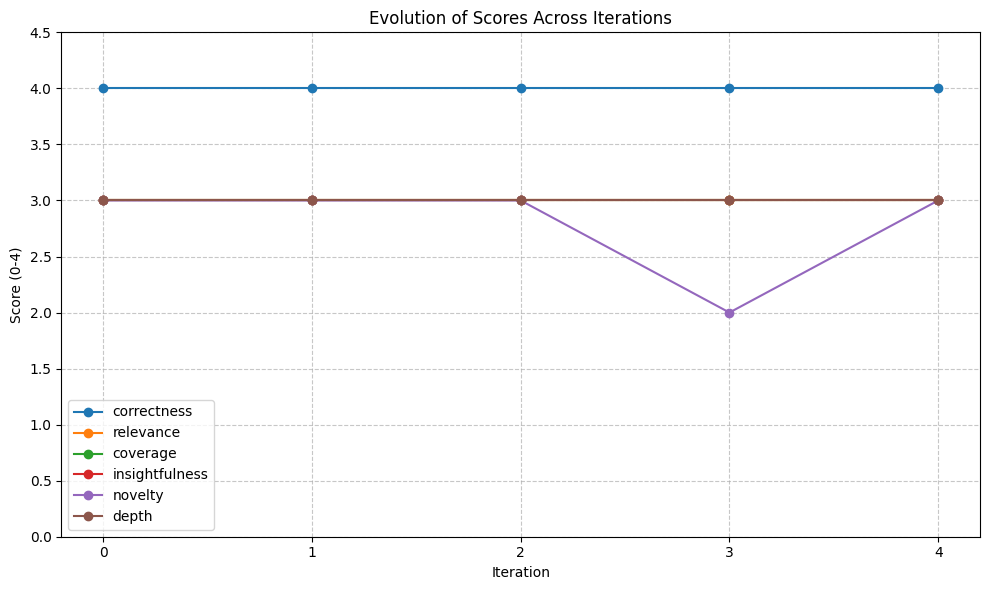


=== FINAL RESULTS ===
✅ Domain: Expense Management
✅ Core Concepts: Expense Reporting Automation, Regulatory Compliance in Expense Management, Emerging Technologies in Expense Management, Fraud Detection in Expense Management, Employee Expense Auditing, Integration of AI in Expense Management

📊 DESCRIPTIVE ANALYSIS:
The dataset provides a comprehensive view of expense management processes, highlighting a high degree of uniqueness in transaction amounts and user identifiers, which suggests a diverse range of expenses and users. The data is predominantly processed, indicating a streamlined workflow. However, the 'type' column lacks data, which could be crucial for categorizing expenses more effectively. The presence of unique identifiers like 'number' and 'source_id' facilitates tracking and auditing, essential for maintaining regulatory compliance and detecting anomalies.

🔮 PREDICTIVE ANALYSIS:
Given the current trends in expense management, the integration of AI and automation is li

{'profile': {'raw': {'n_rows': 500,
   'n_cols': 12,
   'columns': {'amount': {'dtype': 'int64',
     'unique_ratio': 0.982,
     'sample': ['4847', '1305', '1508', '7134', '5637'],
     'min': np.int64(52),
     'max': np.int64(8908),
     'mean': np.float64(3218.254),
     'std': np.float64(2487.531)},
    'department': {'dtype': 'object',
     'unique_ratio': 0.014,
     'sample': ['Customer Support',
      'Sales',
      'Customer Support',
      'Customer Support',
      'Customer Support']},
    'type': {'dtype': 'float64',
     'unique_ratio': 0.0,
     'sample': ['nan', 'nan', 'nan', 'nan', 'nan'],
     'min': np.float64(nan),
     'max': np.float64(nan),
     'mean': nan,
     'std': np.float64(nan)},
    'state': {'dtype': 'object',
     'unique_ratio': 0.008,
     'sample': ['Processed',
      'Processed',
      'Processed',
      'Processed',
      'Processed']},
    'source_id': {'dtype': 'object',
     'unique_ratio': 0.602,
     'sample': ['JPQ-84611536', 'AJB-64072076',

In [3]:
# Example usage:
result = run_and_visualize("https://drive.google.com/uc?export=download&id=1c_phR5nOSdaHxsXtho3trbHJOUfXRuAv", max_cycles=5)



result

In [4]:
# If you want to save the results to a file:
from agents.d2insight_agent_sys import NumpyEncoder


with open("exp02_d2insight_sys_insightbench_result.json", "w") as f:
    json.dump(result, f, indent=2, cls=NumpyEncoder)